Image segmentation is an important step in image processing, and it seems everywhere if we want to analyze what’s inside the image. For example, if we seek to find if there is a chair or person inside an indoor image, we may need image segmentation to separate objects and analyze each object individually to check what it is. Image segmentation usually serves as the pre-processing before pattern recognition, feature extraction, and compression of the image.

Image segmentation is the classification of an image into different groups. Many kinds of research have been done in the area of image segmentation using clustering. There are different methods and one of the most popular methods is K-Means clustering algorithm.

So here, we will explore a method to read an image and cluster different regions of the image. But before doing lets first talk about:

1. Image Segmentation
2. How Image segmentation works
3. K-Means clustering ML Algorithm
4. Merge K-Means clustering Algorithm with Image Segmentation.


Image segmentation is the process of partitioning a digital image into multiple distinct regions containing each pixel(sets of pixels, also known as superpixels) with similar attributes.

The goal of Image segmentation is to change the representation of an image into something that is more meaningful and easier to analyze.

Image segmentation is typically used to locate objects and boundaries(lines, curves, etc.) in images. More precisely, Image Segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.

#### Why does Image Segmentation even matter?

If we take an example of Autonomous Vehicles, they need sensory input devices like cameras, radar, and lasers to allow the car to perceive the world around it, creating a digital map. Autonomous driving is not even possible without object detection which itself involves image classification/segmentation.

Other examples involve Healthcare Industry where if we talk about Cancer, even in today’s age of technological advancements, cancer can be fatal if we don’t identify it at an early stage. Detecting cancerous cell(s) as quickly as possible can potentially save millions of lives. The shape of the cancerous cells plays a vital role in determining the severity of cancer which can be identified using image classification algorithms.



#### How Image Segmentation works
 
Image Segmentation involves converting an image into a collection of regions of pixels that are represented by a mask or a labeled image. By dividing an image into segments, one can process only the important segments of the image instead of processing the entire image.

A common technique is to look for abrupt discontinuities in pixel values, which typically indicate edges that define a region.

Another common approach is to detect similarities in the regions of an image. Some techniques that follow this approach are region growing, clustering, and thresholding.

A variety of other approaches to perform image segmentation have been developed over the years using domain-specific knowledge to effectively solve segmentation problems in specific application areas.

So let us start with one of the clustering-based approaches in Image Segmentation which is K-Means clustering.



#### K-Means clustering algorithm
 
Ok first What are Clustering algorithms in Machine Learning?

Clustering algorithms are unsupervised algorithms but are similar to Classification algorithms but the basis is different.

In Clustering, you don't know what you are looking for, and you are trying to identify some segments or clusters in your data. When you use clustering algorithms in your dataset, unexpected things can suddenly pop-up like structures, clusters, and groupings you would have never thought otherwise.

K-Means clustering algorithm is an unsupervised algorithm and it is used to segment the interest area from the background. It clusters, or partitions the given data into K-clusters or parts based on the K-centroids.

The algorithm is used when you have unlabeled data(i.e. data without defined categories or groups). The goal is to find certain groups based on some kind of similarity in the data with the number of groups represented by K.

The objective of K-Means clustering is to minimize the sum of squared distances between all points and the cluster center.

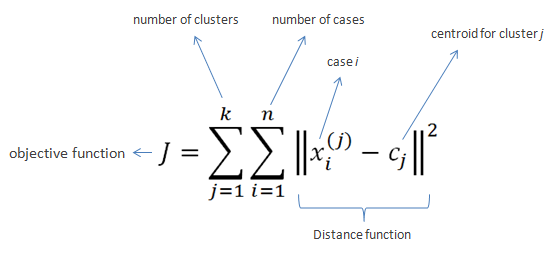

                           Pic Credit: saedsayad.com

#### Steps in K-Means algorithm:

Choose the number of clusters K.

1. Select at random K points, the centroids(not necessarily from your dataset).

2. Assign each data point to the closest centroid → that forms K clusters.

3. Compute and place the new centroid of each cluster.

4. Reassign each data point to the new closest centroid. If any reassignment . took place, go to step 4, otherwise, the model is ready.

#### choosing the optimal value of K

For a certain class of clustering algorithms (in particular K-Means, K-medoids, and expectation-maximization algorithm), there is a parameter commonly referred to as K that specifies the number of clusters to detect. Other algorithms such as DBSCAN and OPTICS algorithm do not require the specification of this parameter; Hierarchical Clustering avoids the problem altogether but that's beyond the scope of this article.

If we talk about K-Means then the correct choice of K is often ambiguous, with interpretations depending on the shape and scale of the distribution of points in a data set and the desired clustering resolution of the user. In addition, increasing K without penalty will always reduce the amount of error in the resulting clustering, to the extreme case of zero error if each data point is considered its own cluster (i.e., when K equals the number of data points, n). Intuitively then, the optimal choice of K will strike a balance between maximum compression of the data using a single cluster, and maximum accuracy by assigning each data point to its own cluster.

If an appropriate value of K is not apparent from prior knowledge of the properties of the data set, it must be chosen somehow. There are several categories of methods for making this decision and Elbow method is one such method.

#### Elbow method
 
The basic idea behind partitioning methods, such as K-Means clustering, is to define clusters such that the total intra-cluster variation or in other words, total within-cluster sum of square (WCSS) is minimized. The total WCSS measures the compactness of the clustering and we want it to be as small as possible.

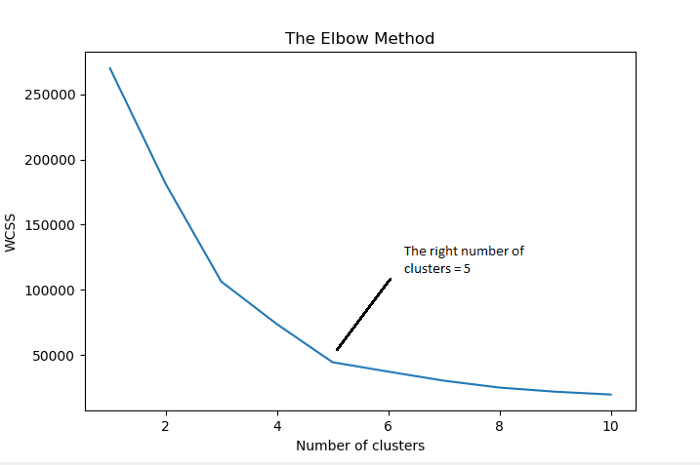

The Elbow method looks at the total WCSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WCSS.

#### Steps to choose the optimal number of clusters K:(Elbow Method)

Compute K-Means clustering for different values of K by varying K from 1 to 10 clusters.
For each K, calculate the total within-cluster sum of square (WCSS).
Plot the curve of WCSS vs the number of clusters K.
The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.
There is a catch!!!

In spite of all the advantages K-Means have got but it fails sometimes due to the random choice of centroids which is called The Random Initialization Trap.

To solve this issue we have an initialization procedure for K-Means which is called K-Means++(Algorithm for choosing the initial values for K-Means clustering).

In K-Means++, We pick a point randomly and that's your first centroid, then we pick the next point based on the probability that depends upon the distance of the first point, the further apart the point is the more probable it is.

Then we have two centroids, repeat the process, the probability of each point is based on its distance to the closest centroid to that point. Now, this introduces an overhead in the initialization of the algorithm, but it reduces the probability of a bad initialization leading to bad clustering result.



Enough of theory lets implement what we have discussed in a real-world scenario.

In this section, we will explore a method to read an image and cluster different regions of the image using the K-Means clustering algorithm and OpenCV.

In [1]:
## Importing all the libraries
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

In [2]:
image = misc.face()  ## LOading Racoon

In [3]:
image

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

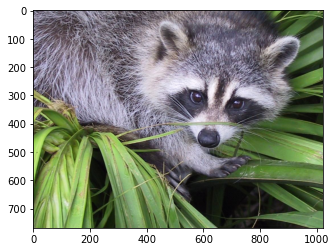

In [4]:
imgplot = plt.imshow(image)   ## Plotting Racoon

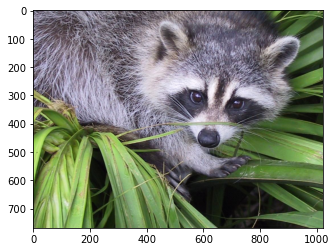

In [5]:
imgplot = plt.imshow(image, cmap = 'gray')  

(array([3473.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  613.]),
 array([0.        , 0.01785714, 0.03571429, 0.05357143, 0.07142857,
        0.08928571, 0.10714286, 0.125     , 0.14285714, 0.16071429,
        0.17857143, 0.19642857, 0.21428571, 0.23214286, 0.25      ,
        0.26785714, 0.28571429, 0.30357143, 0.32142857, 0.33928571,
        0.35714286, 0.375     , 0.39285714, 0.41071429, 0.42857143,
        0.44642857, 0.46428571, 0.48214286, 0.5       , 0.51785714,
        0.53571429, 0.55357143, 0.57142857, 0.58928571, 0.60714286,
        0.625     , 0.64285714, 0.66071429, 0.67857143, 0.69642857,
      

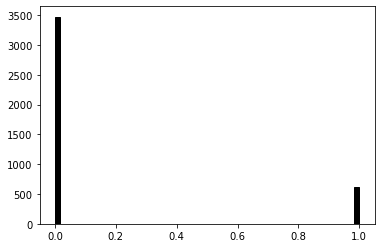

In [6]:
plt.hist(image.ravel(), bins=56, range=(0.0, 1.0), fc='k', ec='k')   ## checking distribution of pixels

Next, converts the MxNx3 image into a Kx3 matrix where K=MxN and each row is now a vector in the 3-D space of RGB.

In [7]:
vectorized = image.reshape((-1,3))

We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.



In [8]:
vectorized = np.float32(vectorized)

We are going to cluster with k = 5 as required.

Define criteria, number of clusters(K) and apply k-means()

In [9]:
import cv2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

OpenCV provides cv2.kmeans(samples, nclusters(K), criteria, attempts, flags) function for color clustering.

1. samples: It should be of np.float32 data type, and each feature should be put in a single column.

2. nclusters(K): Number of clusters required at the end

3. criteria: It is the iteration termination criteria. When this criterion is satisfied, the algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:

Type of termination criteria. It has 3 flags as below:

  * cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.

  * cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.

  * cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.

4. attempts: Flag to specify the number of times the algorithm is executed using different initial labelings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

5. flags: This flag is used to specify how initial centers are taken. Normally two flags are used for this: cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

In [19]:
K = 7
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)


In [20]:
center = np.uint8(center)  ## Now convert back into uint8.

Next, we have to access the labels to regenerate the clustered image

In [21]:
res = center[label.flatten()]
result_image = res.reshape((image.shape))

result_image is the result of the frame which has undergone k-means clustering.

Now let us visualize the output result with K=3, 5, 7



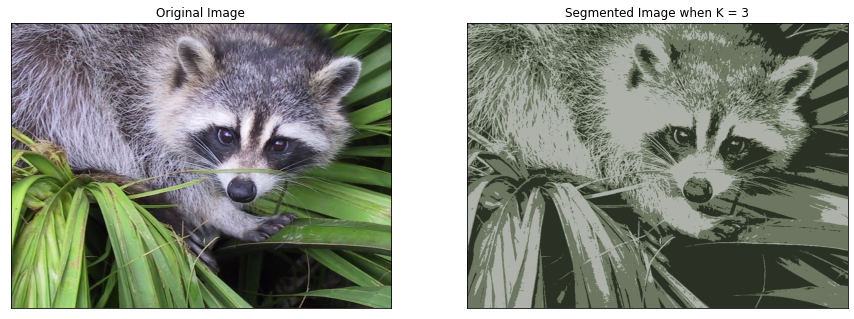

In [18]:

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

So the algorithm has categorized our original image into three dominant colors.

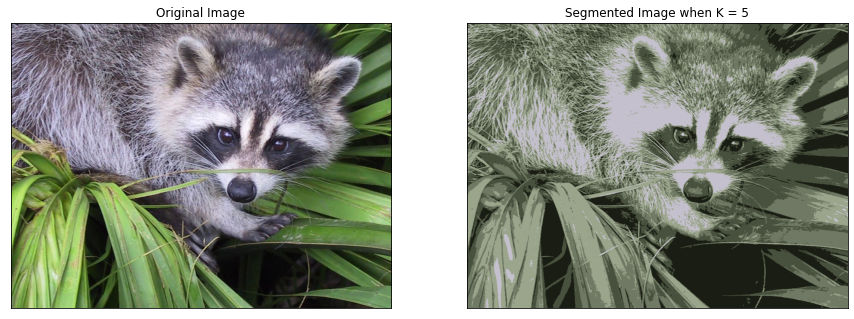

In [13]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

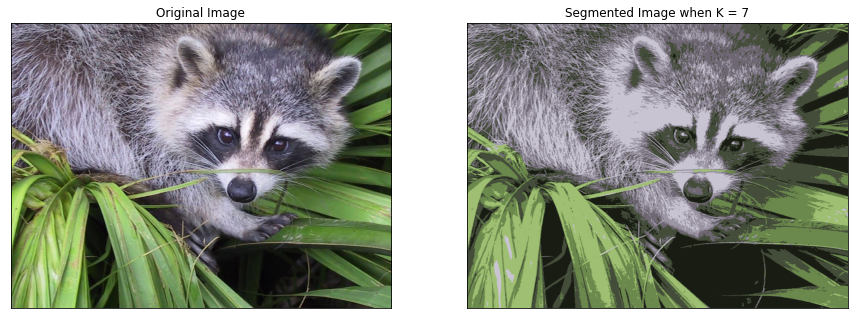

In [22]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

As we can see with an increase in the value of K, the image becomes clearer because the K-means algorithm can classify more classes/cluster of colors.

Due to advancements in Image processing, Machine learning, AI and related technologies, there will be millions of robots in the world in a few decades time, transforming the way we live our daily lives. These advancements will involve spoken commands, anticipating the information requirements of governments, translating languages, recognizing and tracking people and things, diagnosing medical conditions, performing surgery, reprogramming defects in human DNA, driverless cars and many more applications, the count of real-life applications is endless.

## Thanks!!